# **Business Data Science Project - Inside Airbnb (multi-city listings, reviews, calendars)**
### by Anastasia Bouev-Dombre, Arthur Morvan, Aliénor Sabourdin, Elise Deyris

# Objective: Smarter pricing (predict how price affects bookings)


*   Idea: If a night is too expensive, fewer people book; too cheap, you leave money on the table.
* What we build: A model that predicts, for each date, how likely a night is to be booked at a given price.
* Output: Recommended price per date (e.g., “15 July: price ≈ 120 for ≈ 80% booking probability”).

For the first part concerning **Data Collection & Cleaning**
We will:
- Load the three CSV files(listings, calendar, reviews), we decided to focus on the city of Bordeaux, France.
- Inspect their structure
- Handle missing values (especially prices and reviews)
- Normalize price and availability fields
- Perform basic geospatial cleaning (coordinates and neighbourhood mapping)
- Export cleaned datasets for later feature engineering and modeling.

## Cleaning

### Overview

In [136]:
#imports and paths
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)

LISTINGS_PATH = "Data/Airbnb-Listings-Data.csv"
CALENDAR_PATH = "Data/Airbnb-Calendar-Data.csv"
REVIEWS_PATH = "Data/Airbnb-Reviews.csv"


In [137]:

listings_raw= pd.read_csv(LISTINGS_PATH)
calendar_raw= pd.read_csv(CALENDAR_PATH)
reviews_raw = pd.read_csv(REVIEWS_PATH)

print("Listings shape:", listings_raw.shape)
print("Calendar shape:", calendar_raw.shape)
print("Reviews shape:", reviews_raw.shape)


Listings shape: (12383, 79)
Calendar shape: (4519796, 7)
Reviews shape: (449626, 6)


In [138]:
#displaying csv files info
print("\nListings head:")
display(listings_raw.head())
print("\nCalendar head:")
display(calendar_raw.head())
print("\nReviews head:")
display(reviews_raw.head())
print("\nListings info:")
listings_raw.info()
print("\nCalendar info:")
calendar_raw.info()
print("\nReviews info:")
reviews_raw.info()


Listings head:


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,222887,https://www.airbnb.com/rooms/222887,20250615022817,2025-06-26,city scrape,"Spectacular view, full air-con, elevator",Imagine yourself relaxing on a 12m² private te...,✔ NEARBY MARKETS – Located near St Michel anti...,https://a0.muscache.com/pictures/8f2b210e-3c0e...,1156398,https://www.airbnb.com/users/show/1156398,Suzanne,2011-09-14,"Duras, France","Originally from New Zealand, I now divide my t...",within an hour,100%,94%,t,https://a0.muscache.com/im/pictures/user/User/...,https://a0.muscache.com/im/pictures/user/User/...,Hôtel de Ville - Quinconces,25,31,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Bordeaux Sud,Bordeaux,44.836102,-0.566395,Entire vacation home,Entire home/apt,4,1.0,1 bath,2.0,3.0,"[""Shower gel"", ""Blender"", ""Waterfront"", ""Paid ...",$266.00,3,90,3.0,5.0,90.0,90.0,4.6,90.0,NaN,t,2,7,12,248,2025-06-26,127,31,5,77,28,186,49476.0,2012-01-04,2025-06-22,4.83,4.83,4.75,4.90,4.96,4.75,4.69,3306300031048,t,4,4,0,0,0.77
1,247452,https://www.airbnb.com/rooms/247452,20250615022817,2025-06-26,city scrape,"Cosy apartment ,barbecue, pool",NaN,NaN,https://a0.muscache.com/pictures/39503733/4b3c...,959918,https://www.airbnb.com/users/show/959918,Krista,2011-08-12,"Bordeaux, France","Hi, I'm Krista, 53 years old, Belgian and livi...",within a day,67%,69%,f,https://a0.muscache.com/im/users/959918/profil...,https://a0.muscache.com/im/users/959918/profil...,NaN,1,1,"['email', 'phone']",t,t,NaN,Saint-Mdard-en-Jalles,Saint-Mdard-en-Jalles,44.858900,-0.727350,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,2.0,"[""Private pool"", ""Heating"", ""Wine glasses"", ""W...",$115.00,3,30,3.0,3.0,30.0,30.0,3.0,30.0,NaN,t,24,34,57,147,2025-06-26,79,9,0,147,12,54,6210.0,2012-04-23,2025-04-03,4.73,4.75,4.69,4.96,4.88,4.55,4.61,NaN,f,1,1,0,0,0.49
2,317273,https://www.airbnb.com/rooms/317273,20250615022817,2025-06-26,city scrape,"Luxury, spacious, patio, near public gardens",Bordeaux City Gardens is a luxurious one-bedro...,✔ PRIME LOCATION – Situated near the Bordeaux ...,https://a0.muscache.com/pictures/miso/Hosting-...,1156398,https://www.airbnb.com/users/show/1156398,Suzanne,2011-09-14,"Duras, France","Originally from New Zealand, I now divide my t...",within an hour,100%,94%,t,https://a0.muscache.com/im/pictures/user/User/...,https://a0.muscache.com/im/pictures/user/User/...,Hôtel de Ville - Quinconces,25,31,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Chartrons - Grand Parc - Jardin Public,Bordeaux,44.847801,-0.581046,Entire rental unit,Entire home/apt,3,1.5,1.5 baths,1.0,2.0,"[""Paid parking garage 


Calendar head:


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,222887,2025-06-26,f,NaN,NaN,3,90
1,222887,2025-06-27,f,NaN,NaN,3,90
2,222887,2025-06-28,f,NaN,NaN,3,90
3,222887,2025-06-29,t,NaN,NaN,3,90
4,222887,2025-06-30,f,NaN,NaN,5,90



Reviews head:


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,222887,836020,2012-01-04,960075,Marjon,Suzanna's apartment is amazing and it was a tr...
1,222887,2717072,2012-10-25,2887504,Trevor,Great communication & directions from railway...
2,222887,2994458,2012-11-30,405763,William,Fabulous location over Bordeaux and manager ve...
3,222887,3561127,2013-02-17,169773,Daniel,Location is always a must for us and this plac...
4,222887,4230818,2013-04-21,4415172,Sue,This apartment is delightful. Thoughtfully an...



Listings info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12383 entries, 0 to 12382
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            12383 non-null  int64  
 1   listing_url                                   12383 non-null  object 
 2   scrape_id                                     12383 non-null  int64  
 3   last_scraped                                  12383 non-null  object 
 4   source                                        12383 non-null  object 
 5   name                                          12383 non-null  object 
 6   description                                   12095 non-null  object 
 7   neighborhood_overview                         6032 non-null   object 
 8   picture_url                                   12383 non-null  object 
 9   host_id                                      

Remarks:

* Price formatting: In the listings dataset, the price column is stored as strings like "$266.00" and contains missing values. We will convert it to numeric format and handle the missing entries.

* Boolean fields:host_is_superhost, host_has_profile_pic, and instant_bookable appear as "t,f". We will transform them in proper boolean values

* Missing values in texts: neighborhood_overview, host_about, and description have many missing values,  We will decide whether to impute them or ignore them for modeling

* Missing numeric values:bedrooms, beds, and bathrooms contain missing values

* Dates stored as strings: last_scraped, host_since, first_review... will be converted to proper datetime objects

* Geospatial cleaning: Since latitude and longitude are complete, we will filter listings to keep only those located within the Bordeaux area.

### Cleaning Listings Data

- Load the CSV file
- Clean the price column
- Filter to Bordeaux city boundaries (geospatial)
- Parse date columns to datetime
- Convert boolean columns
- Clean percentage columns
- Handle amenities and host_verifications (count items)
- Parse bathrooms column (extract numeric)
- Impute missing important numeric, categorical, and text values
- Format ID columns as strings
- Create date features (month, day of week)
- Remove duplicate listings

In [139]:
import json
import re

In [140]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!! petite modif ici puisquón avait déjà load le dataset !!!!!!!!!!!!!!!!!!!!!!!!!!!!!
listings = listings_raw.copy()

In [141]:
# remove irrelevant columns that can be confusing for our upcoming analysis
columns_to_remove = [
    # URLs and images aren't needed
    'listing_url', 'host_url', 'picture_url', 
    'host_thumbnail_url', 'host_picture_url',
    
    # text fields that are irrelevant for our analysis
    'description', 'neighborhood_overview', 'host_about', 'name',
    'host_id', 'host_name', 'host_location', 'license',
    
    # redundant columns (we have cleaned/aggregated versions)
    'bathrooms_text',  # we have bathrooms_clean
    'bathrooms',  # we have bathrooms_clean
    'amenities',  # we have amenities_count
    'host_verifications',  # we have host_verifications_count
    'latitude', 'longitude', # dropping latitude and longitude columns as we won't use them, we will rather refer to the neighborhood.
    
    # metadata that is not needed
    'scrape_id', 'source', 'last_scraped',  
    'calendar_last_scraped', 'calendar_updated',
    
    # redundant date features (we'll create from calendar dates instead)
    'month', 'day_of_week',  # these are from last_scraped, not useful
    
    # redundant availability (we have calendar data for date-level availability)
    'has_availability',  # we have date-level availability in calendar
    
    # other redundant columns
    'host_listings_count',  # we have calculated_host_listings_count
    'host_total_listings_count',  # redundant with calculated_host_listings_count
    'neighbourhood',  # we have neighbourhood_cleansed
    'host_neighbourhood',  # not needed
]

# Remove columns that exist
cols_to_drop = [col for col in columns_to_remove if col in listings.columns]
listings = listings.drop(columns=cols_to_drop)

In [142]:
# Clean the price column
if "price" in listings.columns:
    listings["price"] = listings["price"].replace(r'[\$,]', '', regex=True).astype(float)
    listings["price"] = listings["price"].fillna(listings["price"].median())

In [143]:
# Filter to Bordeaux city boundaries
# Remove listings outside Bordeaux bounding box
def bordeaux_bound(df, lat_col="latitude", lon_col="longitude"):
    mask = (df[lat_col].between(44.792, 44.890)) & (df[lon_col].between(-0.620, -0.520))
    return df[mask]
if {"latitude", "longitude"} <= set(listings.columns):
    listings =bordeaux_bound(listings)

In [144]:
# data columns in datetime
date_cols = ["last_scraped", "host_since", "first_review","last_review"]
for col in date_cols:
    if col in listings.columns:
        listings[col] = pd.to_datetime(listings[col],errors="coerce")


In [145]:
# convert boolean columns
def map_tf_to_bool(series):
    return series.map({'t': True, 'f': False, 'True': True, 'False': False}).astype('boolean')

bool_cols = [
    "host_is_superhost", "host_has_profile_pic", "host_identity_verified",
    "has_availability", "instant_bookable"
]
for col in bool_cols:
    if col in listings.columns:
        listings[col] = map_tf_to_bool(listings[col])

def clean_percentage(series):
    return series.str.replace('%', '', regex=False).astype(float)
for col in ['host_response_rate', 'host_acceptance_rate']:
    if col in listings.columns:
        listings[col] = clean_percentage(listings[col])

In [146]:
# handle amenities and host_verifications (count items), parse bathroom column,s
def count_items(x):
    if pd.isna(x) or x in ['[]', '']:
        return 0
    try:
        items = json.loads(x.replace("'", '"'))
        return len(items)
    except:
        return x.count(',') + 1

for col in ["amenities", "host_verifications"]:
    if col in listings.columns:
        listings[col] = listings[col].fillna('[]')
        listings[f"{col}_count"] =listings[col].apply(count_items)

def parse_bathrooms(text):
    if pd.isna(text): return None
    t = str(text).lower()
    if 'half' in t: return 0.5
    m = re.search(r'(\d+(\.\d+)?)', t)
    if m: return float(m.group(1))
    return None

if "bathrooms_text" in listings.columns:
    listings["bathrooms_clean"] = listings["bathrooms_text"].apply(parse_bathrooms)
elif "bathrooms" in listings.columns:
    listings["bathrooms_clean"] = pd.to_numeric(listings["bathrooms"], errors="coerce")
    listings["bathrooms_clean"] = listings["bathrooms_clean"].fillna(listings["bathrooms_clean"].median())

In [147]:
# handle missing values
num_cols = ["price", "accommodates", "bedrooms", "beds", "bathrooms_clean"]
for col in num_cols:
    if col in listings.columns:
        listings[col] = listings[col].fillna(listings[col].median())
cat_cols = ["room_type", "property_type", "neighbourhood_cleansed"]
for col in cat_cols:
    if col in listings.columns:
        listings[col] = listings[col].fillna(listings[col].mode()[0])
for col in ["description", "neighborhood_overview", "host_about"]:
    if col in listings.columns:
        listings[col] = listings[col].fillna("")

In [148]:
# format ID columns as strings
for col in ["id", "scrape_id", "host_id"]:
    if col in listings.columns:
        listings[col] = listings[col].astype(str)

In [149]:
# create date features (month, day of week)
if "last_scraped" in listings.columns:
    listings["month"] = listings["last_scraped"].dt.month
    listings["day_of_week"] = listings["last_scraped"].dt.dayofweek

In [150]:
# remove duplicates
if "id" in listings.columns:
    listings = listings.drop_duplicates(subset="id", keep="first")


In [151]:
print("CLEAN SHAPE:", listings.shape)
print(f"Removed {len(cols_to_drop)} irrelevant columns")
print(f"Remaining columns: {listings.shape[1]}")
listings.head()

CLEAN SHAPE: (12383, 50)
Removed 29 irrelevant columns
Remaining columns: 50


,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,222887,2011-09-14,within an hour,100.0,94.0,True,True,True,Bordeaux Sud,Bordeaux,Entire vacation home,Entire home/apt,4,2.0,3.0,266.0,3,90,3.0,5.0,90.0,90.0,4.6,90.0,2,7,12,248,127,31,5,77,28,186,49476.0,2012-01-04,2025-06-22,4.83,4.83,4.75,4.90,4.96,4.75,4.69,True,4,4,0,0,0.77
1,247452,2011-08-12,within a day,67.0,69.0,False,True,True,Saint-Mdard-en-Jalles,Saint-Mdard-en-Jalles,Entire rental unit,Entire home/apt,4,2.0,2.0,115.0,3,30,3.0,3.0,30.0,30.0,3.0,30.0,24,34,57,147,79,9,0,147,12,54,6210.0,2012-04-23,2025-04-03,4.73,4.75,4.69,4.96,4.88,4.55,4.61,False,1,1,0,0,0.49
2,317273,2011-09-14,within an hour,100.0,94.0,True,True,True,Chartrons - Grand Parc - Jardin Public,Bordeaux,Entire rental unit,Entire home/apt,3,1.0,2.0,203.0,3,90,3.0,3.0,90.0,90.0,3.0,90.0,2,11,28,273,80,20,0,100,19,120,24360.0,2014-08-13,2025-04-29,4.90,4.98,4.83,4.96,4.96,4.96,4.78,True,4,4,0,0,0.60
3,317658,2011-09-14,within an hour,100.0,94.0,True,True,True,Centre ville (Bordeaux),Bordeaux,Entire rental unit,Entire home/apt,6,2.0,4.0,222.0,3,90,2.0,5.0,90.0,90.0,4.5,90.0,11,17,27,269,161,17,0,93,21,102,22644.0,2012-03-15,2025-04-28,4.87,4.85,4.83,4.88,4.92,4.97,4.77,True,4,4,0,0,1.00
4,333031,2012-02-04,within an hour,86.0,82.0,True,True,True,Centre ville (Bordeaux),Bordeaux,Entire rental unit,Entire home/apt,2,0.0,1.0,103.0,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,24,54,82,353,556,53,4,178,47,255,26265.0,2012-04-02,2025-06-09,4.92,4.95,4.95,4.95,4.92,4.98,4.83,False,2,1,1,0,3.45


In [152]:
# check missing values
missing_summary = listings.isnull().sum()
missing_summary

id                                                 0
host_since                                         0
host_response_time                              4538
host_response_rate                              4538
host_acceptance_rate                            3644
host_is_superhost                                248
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                       0
property_type                                      0
room_type                                          0
accommodates                                       0
bedrooms                                           0
beds                                               0
price                                              0
minimum_nights                                     0
maximum_nights                                     0
minimum_minimum_nights                        

In [153]:
# Only keep the year for "last_review" and "first_review", we assume the day and the month are not relevant for our analysis
listings['first_review_year'] = listings['first_review'].dt.year
listings = listings.drop(columns=['first_review'])

listings['last_review_year'] = listings['last_review'].dt.year
listings = listings.drop(columns=['last_review'])

# For these columns, we will assume that if the data is missing it is because there has never been any reviews.
# We will therefore fill the missing values with the maximum year found in the dataset plus one (indicating no reviews up to now)
max_year = listings[['first_review_year', 'last_review_year']].max().max()

listings['first_review_year'] = listings['first_review_year'].fillna(max_year)
listings['last_review_year'] = listings['last_review_year'].fillna(max_year)

In [154]:
# we will impute missing values with the median for numerical columns and the mode for categorical columns
# for the boolean columns, we can fill missing values with False

num_cols = listings.select_dtypes(include=['float64', 'int64']).columns
cat_cols = listings.select_dtypes(include=['object', 'category']).columns
bool_cols = listings.select_dtypes(include=['boolean']).columns


for col in num_cols:
    listings[col] = listings[col].fillna(listings[col].median())
for col in cat_cols:
    listings[col] = listings[col].fillna(listings[col].mode()[0])
for col in bool_cols:
    listings[col] = listings[col].fillna(False)


In [155]:
# check missing values
missing_summary = listings.isnull().sum()
missing_summary

id                                              0
host_since                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
neighbourhood_group_cleansed                    0
property_type                                   0
room_type                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0


### Cleaning Calendar Data

The calendar data is critical for booking prediction as it contains:
- Date-level availability (available/booked labels)
- Price per date
- Minimum/maximum nights requirements

We will:
- Filter to Bordeaux listings (join with cleaned listings)
- Parse date column to datetime
- Convert available column to boolean
- Handle missing prices (use listing's base price or median)
- Create booking label (booked = not available)
- Remove invalid dates


In [156]:
# --- Load calendar data ---

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!! petite modif ici puisquón avait déjà load le dataset !!!!!!!!!!!!!!!!!!!!!!!!!!!!!
calendar = calendar_raw.copy()

print("Calendar raw shape:", calendar.shape)
print("\nCalendar columns:", calendar.columns.tolist())
print("\nCalendar dtypes:")
print(calendar.dtypes)
print("\nCalendar head:")
display(calendar.head())
print("\nMissing values:")
print(calendar.isnull().sum())
print("\nAvailable values unique:", calendar['available'].unique() if 'available' in calendar.columns else "N/A")


Calendar raw shape: (4519796, 7)

Calendar columns: ['listing_id', 'date', 'available', 'price', 'adjusted_price', 'minimum_nights', 'maximum_nights']

Calendar dtypes:
listing_id          int64
date               object
available          object
price             float64
adjusted_price    float64
minimum_nights      int64
maximum_nights      int64
dtype: object

Calendar head:


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,222887,2025-06-26,f,NaN,NaN,3,90
1,222887,2025-06-27,f,NaN,NaN,3,90
2,222887,2025-06-28,f,NaN,NaN,3,90
3,222887,2025-06-29,t,NaN,NaN,3,90
4,222887,2025-06-30,f,NaN,NaN,5,90



Missing values:
listing_id              0
date                    0
available               0
price             4519796
adjusted_price    4519796
minimum_nights          0
maximum_nights          0
dtype: int64

Available values unique: ['f' 't']


In [157]:
# filter to Bordeaux listings only
calendar['listing_id'] = calendar['listing_id'].astype(str)
bordeaux_listing_ids = set(listings['id'].astype(str))
calendar = calendar[calendar['listing_id'].isin(bordeaux_listing_ids)].copy()

In [158]:
# Separate date column into 'Year', 'Month', 'Day'
calendar['date'] = pd.to_datetime(calendar['date'], errors='coerce')

calendar['year'] = calendar['date'].dt.year
calendar['month'] = calendar['date'].dt.month
calendar['day'] = calendar['date'].dt.day



In [159]:
# convert available to boolean

calendar['available'] = calendar['available'].map({'t': True, 'f': False, 'True': True, 'False': False, True: True, False: False})
calendar['available'] = calendar['available'].astype('boolean')
calendar['is_booked'] = ~calendar['available']  # booked = not available

In [160]:
# handle prices - chain: adjusted_price -> price -> listing price -> median
listings_price_map = listings.set_index('id')['price'].to_dict()
calendar['listing_base_price'] = calendar['listing_id'].map(listings_price_map)

In [161]:
# create price_clean using fillna chain
if 'adjusted_price' in calendar.columns and 'price' in calendar.columns:
    calendar['price_clean'] = calendar['adjusted_price'].fillna(calendar['price']).fillna(calendar['listing_base_price'])
elif 'adjusted_price' in calendar.columns:
    calendar['price_clean'] = calendar['adjusted_price'].fillna(calendar['listing_base_price'])
elif 'price' in calendar.columns:
    calendar['price_clean'] = calendar['price'].fillna(calendar['listing_base_price'])
else:
    calendar['price_clean'] = calendar['listing_base_price']

# fill remaining missing with median
if calendar['price_clean'].notna().sum() > 0:
    calendar['price_clean'] = calendar['price_clean'].fillna(calendar['price_clean'].median())

# drop price column 
calendar = calendar.drop(columns=['price'])

In [162]:
# remove rows with missing prices
calendar = calendar[calendar['price_clean'].notna()].copy()

# clean up
calendar = calendar.dropna(subset=['listing_id', 'available', 'date'])
calendar = calendar.sort_values(['listing_id', 'date']).reset_index(drop=True)

# remove redundant columns
cols_to_remove =['price', 'adjusted_price', 'listing_base_price']
cols_to_remove = [col for col in cols_to_remove if col in calendar.columns]
calendar = calendar.drop(columns=cols_to_remove)


In [163]:
# display results
print(f"Final calendar shape: {calendar.shape}")
print(f"Date range: {calendar['date'].min()} to {calendar['date'].max()}")
print(f"Booking rate: {calendar['is_booked'].mean():.2%}")
print(f"Price range: {calendar['price_clean'].min():.2f} - {calendar['price_clean'].max():.2f}")
calendar.head(30)


Final calendar shape: (4519796, 10)
Date range: 2025-06-25 00:00:00 to 2026-06-26 00:00:00
Booking rate: 61.68%
Price range: 12.00 - 10000.00


,listing_id,date,available,minimum_nights,maximum_nights,year,month,day,is_booked,price_clean
0,1000537871351948755,2025-06-26,False,1,365,2025,6,26,True,76.0
1,1000537871351948755,2025-06-27,False,1,365,2025,6,27,True,76.0
2,1000537871351948755,2025-06-28,False,1,365,2025,6,28,True,76.0
3,1000537871351948755,2025-06-29,True,1,365,2025,6,29,False,76.0
4,1000537871351948755,2025-06-30,True,1,365,2025,6,30,False,76.0
5,1000537871351948755,2025-07-01,False,1,365,2025,7,1,True,76.0
6,1000537871351948755,2025-07-02,True,1,365,2025,7,2,False,76.0
7,1000537871351948755,2025-07-03,True,1,365,2025,7,3,False,76.0
8,1000537871351948755,2025-07-04,True,1,365,2025,7,4,False,76.0
9,1000537871351948755,2025-07-05,True,1,365,2025,7,5,False,76.0


In [164]:
# check missing values
missing_summary = calendar.isnull().sum()
missing_summary

listing_id        0
date              0
available         0
minimum_nights    0
maximum_nights    0
year              0
month             0
day               0
is_booked         0
price_clean       0
dtype: int64

### Clean Reviews Data

We will:
- Filter to Bordeaux listings 
- Parse date column to datetime
- Handle missing prices 
- Sort by listing_id and date
- Remove irrelevant columns


In [165]:
# --- Load reviews data ---

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!! petite modif ici puisquón avait déjà load le dataset !!!!!!!!!!!!!!!!!!!!!!!!!!!!!
reviews = reviews_raw.copy()
# reviews = pd.read_csv(REVIEWS_PATH)

print("Reviews raw shape:", reviews.shape)
print("\nReviews columns:", reviews.columns.tolist())
print("\nReviews dtypes:")
print(reviews.dtypes)
print("\nMissing values:")
print(reviews.isnull().sum())
print("\nReviews head:")
display(reviews.head())


Reviews raw shape: (449626, 6)

Reviews columns: ['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments']

Reviews dtypes:
listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

Missing values:
listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         9
dtype: int64

Reviews head:


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,222887,836020,2012-01-04,960075,Marjon,Suzanna's apartment is amazing and it was a tr...
1,222887,2717072,2012-10-25,2887504,Trevor,Great communication & directions from railway...
2,222887,2994458,2012-11-30,405763,William,Fabulous location over Bordeaux and manager ve...
3,222887,3561127,2013-02-17,169773,Daniel,Location is always a must for us and this plac...
4,222887,4230818,2013-04-21,4415172,Sue,This apartment is delightful. Thoughtfully an...


In [166]:
# --- Clean Reviews Data ---

# filter to Bordeaux listings only
reviews['listing_id'] = reviews['listing_id'].astype(str)
reviews = reviews[reviews['listing_id'].isin(bordeaux_listing_ids)].copy()

print(f"Reviews after filtering to Bordeaux: {reviews.shape}")

# parse date column to datetime
if 'date' in reviews.columns:
    reviews['date'] = pd.to_datetime(reviews['date'], errors='coerce')
    # Remove rows with invalid dates
    reviews = reviews[reviews['date'].notna()].copy()

# handle missing comments (fill with empty string for now, can be used for sentiment analysis later)
if 'comments' in reviews.columns:
    reviews['comments'] = reviews['comments'].fillna('')


# remove any remaining invalid rows
reviews = reviews.dropna(subset=['listing_id', 'date'])

# sort by listing_id and date
reviews = reviews.sort_values(['listing_id', 'date']).reset_index(drop=True)

# remove irrelevant columns
columns_to_remove_reviews = [
    'reviewer_name',  # not needed for modeling
    'reviewer_id',  # not needed unless analyzing reviewer behavior
    'id',  # review ID not needed (we have listing_id and date)
]

cols_to_drop_rev = [col for col in columns_to_remove_reviews if col in reviews.columns]
reviews = reviews.drop(columns=cols_to_drop_rev)

print(f"\nFinal reviews shape: {reviews.shape}")
print(f"Removed {len(cols_to_drop_rev)} irrelevant columns")
print(f"\nDate range:{reviews['date'].min()} to {reviews['date'].max()}")
print(f"\nReviews with comments: {(reviews['comments'].str.strip() != '').sum()}")
print(f"\nSample of cleaned reviews:")
reviews.head(10)


Reviews after filtering to Bordeaux: (449626, 6)

Final reviews shape: (449626, 3)
Removed 3 irrelevant columns

Date range:2012-01-04 00:00:00 to 2025-06-26 00:00:00

Reviews with comments: 449617

Sample of cleaned reviews:


,listing_id,date,comments
0,1000537871351948755,2023-11-19,Tout s’est très bien passé ! Appartement très ...
1,1000537871351948755,2023-11-26,Ha sido un placer alojarnos con Camille.<br/>H...
2,1000537871351948755,2023-12-10,Je remercie Camille pour son accueil dans l'ap...
3,1000537871351948755,2023-12-15,J'ai passé un court mais excellent sejour chez...
4,1000537871351948755,2024-02-04,Hôte disponible <br/>Logement très accueillant...
5,1000537871351948755,2024-02-18,"Hôte très accueillante , très disponible , log..."
6,1000537871351948755,2024-03-19,"Airbnb, parfait, j’y retournerai sans hésiter !"
7,1000537871351948755,2024-04-02,Merci à Camille pour ce séjour fabuleux ! Le l...
8,1000537871351948755,2024-04-28,"Nous avons passé deux nuits à l'échoppe, l'env..."
9,1000537871351948755,2024-05-06,"Super séjour à l’échoppe, très spacieux et bie..."


In [167]:
# Summuary of Cleaned Datasets


print(f"LISTINGS:")
print(f"Shape: {listings.shape}")
print(f"   Key columns: id, host_id, price, room_type, property_type,")
print(f"                accommodates, bedrooms, beds, bathrooms_clean,")
print(f"                amenities_count, neighbourhood_cleansed, latitude, longitude,")
print(f"                review_scores_*, host_metrics,...")

print("\n")
print(f"CALENDAR:")
print(f"   Shape: {calendar.shape}")
print(f"   Key columns: listing_id, date, available, is_booked, price_clean,")
print(f"                minimum_nights, maximum_nights")

print("\n")
print(f"REVIEWS:")
print(f"   Shape: {reviews.shape}")
print(f"   Key columns: listing_id, date, comments")



LISTINGS:
Shape: (12383, 50)
   Key columns: id, host_id, price, room_type, property_type,
                accommodates, bedrooms, beds, bathrooms_clean,
                amenities_count, neighbourhood_cleansed, latitude, longitude,
                review_scores_*, host_metrics,...


CALENDAR:
   Shape: (4519796, 10)
   Key columns: listing_id, date, available, is_booked, price_clean,
                minimum_nights, maximum_nights


REVIEWS:
   Shape: (449626, 3)
   Key columns: listing_id, date, comments


### Summary of Data Cleaning

**Listings Data**: Cleaned and filtered to Bordeaux 
- Price normalized, dates parsed, booleans converted, missing values handled, duplicates removed

**Calendar Data**: Cleaned and filtered to Bordeaux listings, 
- Date level availability and prices ready for booking prediction, booking labels created (is_booked = not available), missing prices handled

**Reviews Data**: Cleaned and filtered to Bordeaux listings
- Ready for review-based feature engineering

# Merging & Feature Engineering

Workflow for this step is the following: 

1. Merge data
2. Drop 'de facto' useless columns
3. Handle missing values (both numerical & categorical) ------------------------- (je rajoute ça chez Élise plutôt)
4. Encode categorical variables (one-hot/ordinal)
5. Calculate VIF on all features (numerical + encoded categorical)
6. Iteratively remove high VIF variables

And then we will be ready for the next step, prediction.

### Overview

Just getting a grasp of what we are dealing with. We want to merge the datasets. We need the listings to correspond to the calendar dates. 

Here are the columns that we have in the listings and in the calendar datasets:

In [168]:
# compare columns of the three datasets
print("Listings columns:", set(listings.columns))
print("Calendar columns:", set(calendar.columns))
print("Reviews columns:", set(reviews.columns))

Listings columns: {'review_scores_value', 'minimum_nights', 'estimated_occupancy_l365d', 'review_scores_rating', 'last_review_year', 'neighbourhood_cleansed', 'room_type', 'minimum_nights_avg_ntm', 'host_response_time', 'host_identity_verified', 'review_scores_communication', 'calculated_host_listings_count', 'reviews_per_month', 'host_response_rate', 'review_scores_cleanliness', 'calculated_host_listings_count_shared_rooms', 'review_scores_location', 'id', 'availability_365', 'minimum_maximum_nights', 'availability_30', 'number_of_reviews_l30d', 'number_of_reviews_ly', 'neighbourhood_group_cleansed', 'maximum_minimum_nights', 'review_scores_checkin', 'bedrooms', 'price', 'availability_90', 'property_type', 'number_of_reviews', 'accommodates', 'beds', 'number_of_reviews_ltm', 'availability_60', 'host_is_superhost', 'calculated_host_listings_count_entire_homes', 'host_acceptance_rate', 'instant_bookable', 'maximum_maximum_nights', 'maximum_nights_avg_ntm', 'first_review_year', 'maximum_

To get an idea of how we are going to perform the merge, let's see how listings are represented in the different datasets:

In [169]:
# get the rows in each dataset where "id" or "listing_id" is equal to '1605871'
print("\nListings row for id '1605871':")
display(listings[listings['id'] == '1605871'])
print("\nCalendar rows for listing_id '1605871':")
display(calendar[calendar['listing_id'] == '1605871'])
print("\nReviews rows for listing_id '1605871':")
display(reviews[reviews['listing_id'] == '1605871'])


Listings row for id '1605871':


,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,first_review_year,last_review_year
88,1605871,2013-08-31,within an hour,100.0,95.0,False,True,False,Saint Augustin - Tauzin - Alphonse Dupeux,Bordeaux,Entire condo,Entire home/apt,3,1.0,2.0,47.0,3,28,3.0,14.0,1125.0,1125.0,3.4,1125.0,4,25,54,54,124,0,0,54,0,0,0.0,4.67,4.8,4.73,4.87,4.89,4.48,4.65,False,1,1,0,0,0.94,2014.0,2021.0



Calendar rows for listing_id '1605871':


,listing_id,date,available,minimum_nights,maximum_nights,year,month,day,is_booked,price_clean
1600525,1605871,2025-06-25,False,3,1125,2025,6,25,True,47.0
1600526,1605871,2025-06-26,False,3,1125,2025,6,26,True,47.0
1600527,1605871,2025-06-27,False,3,1125,2025,6,27,True,47.0
1600528,1605871,2025-06-28,False,3,1125,2025,6,28,True,47.0
1600529,1605871,2025-06-29,False,3,1125,2025,6,29,True,47.0
...,...,...,...,...,...,...,...,...,...,...
1600885,1605871,2026-06-20,False,3,1125,2026,6,20,True,47.0
1600886,1605871,2026-06-21,False,3,1125,2026,6,21,True,47.0
1600887,1605871,2026-06-22,False,3,1125,2026,6,22,True,47.0
1600888,1605871,2026-06-23,False,3,1125,2026,6,23,True,47.0



Reviews rows for listing_id '1605871':


,listing_id,date,comments
89048,1605871,2014-09-04,Lovely apartment. Close to bus line which take...
89049,1605871,2014-09-06,Lovely clean apartment. Well equipped with eve...
89050,1605871,2015-04-30,Très bon accueil. Ghislaine est toujours dispo...
89051,1605871,2015-05-10,Nous avons loué cet appartement pour 2 nuits ;...
89052,1605871,2015-05-17,"Appartement très agréable, propre et calme\r<b..."
...,...,...,...
89167,1605871,2020-02-24,L'appartement dans un ensemble d'immeubles dan...
89168,1605871,2020-03-01,Parfaitement conforme aux attentes. Je recomma...
89169,1605871,2021-11-02,L’appartement était un peu éloigné du centre v...
89170,1605871,2021-11-09,Emplacement parfait pour notre séjour dans cet...


### Merging

Listings:
- We have one listing ID (column "id") per row in the listings dataset. "id" serves here as a primary key.

Calendar:
-  We have 365 times the same "listing_id" in the dataset. This is because the dataset actually has one row for each day of the year for a certain apartment. The primary key in this table is a composite key made up of "listing_id" and "date".

We will therefore perform a left join from the listings dataset to the calendar dataset, in order to still have the availability of a certain listing for each fay of the year. 

In [170]:
# Perform the left join

merged_df = listings.merge(
    calendar,
    left_on='id',           # Column in listings_df
    right_on='listing_id',  # Column in calendar_df
    how='left'              # Left join
)

print("Calendar shape:", calendar.shape)
print("Listings shape:", listings.shape)
print("Merged DataFrame shape:", merged_df.shape)

Calendar shape: (4519796, 10)
Listings shape: (12383, 50)
Merged DataFrame shape: (4519796, 60)


Merged dataframe:
- So the number of columns is equal to the sum of the number of columns in both datasets. 
- The number of rows is equal to the number of rows in the calendar dataframe.

### Further Cleaning

Let's further clean the merged dataset before proceeding to the feature engineering part.

In [171]:
# creating a copy of merged_df we might refer to later, to check geographical coordinatates fro instance.
merged_df_clean_copy = merged_df.copy()

In [172]:
# lsiting all the columns in the merged dataframe
print("Merged DataFrame columns:", merged_df.columns.tolist())
# merged_df.head()

Merged DataFrame columns: ['id', 'host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights_x', 'maximum_nights_x', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'availability_eoy', 'number_of_reviews_ly', 'estimated_occupancy_l365d', 'estimated_revenue_l365d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count'

In [173]:
# dropping columns "listing_id" as it is now redundant with "id"
merged_df = merged_df.drop(columns=['listing_id'])

# dropping columns "minimum_nights_y" and "maximum_nights_y" as they are redundant with "minimum_nights_x" and "maximum_nights_x"
merged_df = merged_df.drop(columns=['minimum_nights_y', 'maximum_nights_y'])

# renaming columns to have consistent names
merged_df = merged_df.rename(columns={'minimum_nights_x': 'minimum_nights', 'maximum_nights_x': 'maximum_nights'})

In [174]:
# Only keep the year for "host since", we assume the day and the month are not relevant for our analysis

merged_df['host_since_year'] = merged_df['host_since'].dt.year
merged_df = merged_df.drop(columns=['host_since'])

In [175]:
# room_type column is more relevant than property_type for our analysis, so we drop property_type
merged_df = merged_df.drop(columns=['property_type'])

In [176]:
# drop the date column as we have already extracted year, month and day from it
merged_df = merged_df.drop(columns=['date'])

In [177]:
# drop id as it is not relevant for our analysis
merged_df = merged_df.drop(columns=['id'])

In [178]:
# let's drop neighbourhood_cleansed, we will only base ourself on neighbourhood_group_cleansed, which is less granular but still has 28 distinct categories
merged_df = merged_df.drop(columns=['neighbourhood_cleansed'])

In [179]:
# drop 'available' because it has a correlation of -1 with 'is_booked'
merged_df = merged_df.drop(columns=['available'])

In [180]:
# drop these because we already have minimum_nights and maximum_nights
merged_df = merged_df.drop(columns=['maximum_minimum_nights'])
merged_df = merged_df.drop(columns=['minimum_minimum_nights'])
merged_df = merged_df.drop(columns=['maximum_maximum_nights'])
merged_df = merged_df.drop(columns=['minimum_maximum_nights'])
merged_df = merged_df.drop(columns=['minimum_nights_avg_ntm'])
merged_df = merged_df.drop(columns=['maximum_nights_avg_ntm'])

In [181]:
# drop these because we already have the availability for the past 30 days
merged_df = merged_df.drop(columns=['availability_eoy'])
merged_df = merged_df.drop(columns=['availability_60'])
merged_df = merged_df.drop(columns=['availability_90'])
merged_df = merged_df.drop(columns=['availability_365'])

In [182]:
# drop these because we already have the overall review score
merged_df = merged_df.drop(columns=['review_scores_accuracy'])
merged_df = merged_df.drop(columns=['review_scores_cleanliness'])
merged_df = merged_df.drop(columns=['review_scores_value'])
merged_df = merged_df.drop(columns=['review_scores_checkin'])
merged_df = merged_df.drop(columns=['review_scores_communication'])

In [183]:
merged_df = merged_df.drop(columns=['number_of_reviews'])
merged_df = merged_df.drop(columns=['number_of_reviews_ltm'])

In [184]:
merged_df = merged_df.drop(columns=['calculated_host_listings_count_entire_homes'])
merged_df = merged_df.drop(columns=['calculated_host_listings_count_private_rooms'])
merged_df = merged_df.drop(columns=['calculated_host_listings_count_shared_rooms'])

In [185]:
# drop because it is highly correlated with the number of reviews during the past year
merged_df = merged_df.drop(columns=['estimated_occupancy_l365d'])


In [186]:
# drop because it is highly correlated with the number of bedrooms
merged_df = merged_df.drop(columns=['accommodates'])

In [187]:
print(len(merged_df.columns))

30


In [188]:
# print unique values in each column
for col in merged_df.columns:
    unique_values = merged_df[col].nunique()
    print(f"Column '{col}' has {unique_values} unique values.")

Column 'host_response_time' has 4 unique values.
Column 'host_response_rate' has 61 unique values.
Column 'host_acceptance_rate' has 101 unique values.
Column 'host_is_superhost' has 2 unique values.
Column 'host_has_profile_pic' has 2 unique values.
Column 'host_identity_verified' has 2 unique values.
Column 'neighbourhood_group_cleansed' has 28 unique values.
Column 'room_type' has 4 unique values.
Column 'bedrooms' has 10 unique values.
Column 'beds' has 16 unique values.
Column 'price' has 472 unique values.
Column 'minimum_nights' has 48 unique values.
Column 'maximum_nights' has 124 unique values.
Column 'availability_30' has 31 unique values.
Column 'number_of_reviews_l30d' has 21 unique values.
Column 'number_of_reviews_ly' has 131 unique values.
Column 'estimated_revenue_l365d' has 1919 unique values.
Column 'review_scores_rating' has 120 unique values.
Column 'review_scores_location' has 121 unique values.
Column 'instant_bookable' has 2 unique values.
Column 'calculated_host

### Encoding

Encoding certain values will help us 

In [189]:
df_encoded = merged_df.copy()

Encoding boolean variables

In [190]:
boolean_cols = [
    'host_is_superhost',
    'host_has_profile_pic', 
    'host_identity_verified',
    'instant_bookable',
    'is_booked'
]

for col in boolean_cols:
    df_encoded[col] = df_encoded[col].astype(int)

print(f"\nEncoded {len(boolean_cols)} boolean columns to 0/1")



Encoded 5 boolean columns to 0/1


Encoding ordinal variables

In [191]:
# check categories
print(df_encoded['host_response_time'].value_counts())

# Map based on actual categories
response_time_mapping = {
    'within an hour': 0,
    'within a few hours': 1,
    'within a day': 2,
    'a few days or more': 3,
}

df_encoded['host_response_time'] = df_encoded['host_response_time'].map(response_time_mapping)

print("\nEncoded host_response_time (ordinal)")

host_response_time
within an hour        3527726
within a few hours     553705
within a day           327040
a few days or more     111325
Name: count, dtype: int64

Encoded host_response_time (ordinal)


One-hot encoding for categorical variables. The difference between these and the ordinal encoding is that these variables have no meaningful order in their values.

In [192]:
nominal_cols = [
    'neighbourhood_group_cleansed',
    'room_type'
]

print(f"\nOne-hot encoding {len(nominal_cols)} categorical columns")

# Check nb of categories
for col in nominal_cols:
    n_categories = df_encoded[col].nunique()
    print(f"  {col}: {n_categories} categories -> {n_categories-1} dummy columns")

# encoding
df_encoded = pd.get_dummies(
    df_encoded,
    columns=nominal_cols,
    drop_first=True,  # Avoid dummy variable trap where one category can be perfectly predicted from others
    dtype=int
)

print(f"\nAfter encoding, total columns: {df_encoded.shape[1]}")



One-hot encoding 2 categorical columns
  neighbourhood_group_cleansed: 28 categories -> 27 dummy columns
  room_type: 4 categories -> 3 dummy columns

After encoding, total columns: 58


Final check that everything is well encoded.

In [193]:

print("VERIFICATION ------------------------------------- ")

# Check data types
print("\nData types after encoding:")
print(df_encoded.dtypes.value_counts())

# Check for any remaining non-numeric columns
non_numeric = df_encoded.select_dtypes(exclude=['number']).columns.tolist()
if non_numeric:
    print(f"\nWARNING: Non-numeric columns still present: {non_numeric}")
else:
    print("\n✓ All columns are numeric")

# Check for missing values
missing_count = df_encoded.isnull().sum().sum()
if missing_count > 0:
    print(f"\nWARNING: {missing_count} missing values still present")
    print("\nMissing values by column:")
    print(df_encoded.isnull().sum()[df_encoded.isnull().sum() > 0])
else:
    print("✓ No missing values")

# Check for infinite values
inf_count = np.isinf(df_encoded.select_dtypes(include=['float64', 'int64'])).sum().sum()
if inf_count > 0:
    print(f"\nWARNING: {inf_count} infinite values present")
else:
    print("✓ No infinite values")

print("\nREADY FOR VIF ANALYSIS ")
print(f"Final shape: {df_encoded.shape}")
print(f"Columns: {df_encoded.columns.tolist()[:10]}... (showing first 10)")


VERIFICATION ------------------------------------- 

Data types after encoding:
int64      42
float64    12
int32       4
Name: count, dtype: int64

✓ All columns are numeric
✓ No missing values
✓ No infinite values

READY FOR VIF ANALYSIS 
Final shape: (4519796, 58)
Columns: ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'bedrooms', 'beds', 'price', 'minimum_nights']... (showing first 10)


### Splitting features from target (price prediction)

In [194]:
# Separate features and target
# Assuming price_clean is your target variable

def target_features(df, target_col):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    return X, y

# For our first task of predicting price_clean
df_booked = df_encoded[df_encoded['is_booked'] == 1].copy()

X, y = target_features(df_booked, 'price_clean')
X = X.drop(columns=['is_booked', 'price'])

print(f"\nfeatures (X): {X.shape}")
print(f"Target (y): {y.shape}")



features (X): (2787995, 55)
Target (y): (2787995,)


In [195]:
print("PRE-FILTERING ----------------------------------------------- ")

# Remove obvious high correlations --> fatser than VIF
def to_drop_highly_correlated_features(X, threshold=0.9):
    corr_matrix = X.corr().abs()
    upper_triangle = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
    to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.9)]
    return to_drop

print(f"Dropping {len(to_drop_highly_correlated_features(X))} features with correlation > 0.9")
print("features to drop:", to_drop_highly_correlated_features(X))
X_filtered = X.drop(columns=to_drop_highly_correlated_features(X))
print(f"Features remaining: {X_filtered.shape[1]}")


PRE-FILTERING ----------------------------------------------- 


Dropping 0 features with correlation > 0.9
features to drop: []
Features remaining: 55


In [196]:
X_filtered.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,bedrooms,beds,minimum_nights,maximum_nights,availability_30,number_of_reviews_l30d,number_of_reviews_ly,estimated_revenue_l365d,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count,reviews_per_month,first_review_year,last_review_year,year,month,day,host_since_year,neighbourhood_group_cleansed_Ambs,neighbourhood_group_cleansed_Artigues-Prs-Bordeaux,neighbourhood_group_cleansed_Bassens,neighbourhood_group_cleansed_Bgles,neighbourhood_group_cleansed_Blanquefort,neighbourhood_group_cleansed_Bordeaux,neighbourhood_group_cleansed_Bouliac,neighbourhood_group_cleansed_Bruges,neighbourhood_group_cleansed_Carbon-Blanc,neighbourhood_group_cleansed_Cenon,neighbourhood_group_cleansed_Eysines,neighbourhood_group_cleansed_Floirac,neighbourhood_group_cleansed_Gradignan,neighbourhood_group_cleansed_Le Bouscat,neighbourhood_group_cleansed_Le Haillan,neighbourhood_group_cleansed_Le Taillan-Mdoc,neighbourhood_group_cleansed_Lormont,neighbourhood_group_cleansed_Martignas-sur-Jalle,neighbourhood_group_cleansed_Merignac,neighbourhood_group_cleansed_Parempuyre,neighbourhood_group_cleansed_Pessac,neighbourhood_group_cleansed_Saint-Aubin-de-Mdoc,neighbourhood_group_cleansed_Saint-Louis-de-Montferrand,neighbourhood_group_cleansed_Saint-Mdard-en-Jalles,neighbourhood_group_cleansed_Saint-Vincent-de-Paul,neighbourhood_group_cleansed_Talence,neighbourhood_group_cleansed_Villenave-d'Ornon,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,100.0,94.0,1,1,1,2.0,3.0,3,90,2,5,28,49476.0,4.83,4.75,1,4,0.77,2012.0,2025.0,2025,6,26,2011,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,100.0,94.0,1,1,1,2.0,3.0,3,90,2,5,28,49476.0,4.83,4.75,1,4,0.77,2012.0,2025.0,2025,6,27,2011,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,100.0,94.0,1,1,1,2.0,3.0,3,90,2,5,28,49476.0,4.83,4.75,1,4,0.77,2012.0,2025.0,2025,6,28,2011,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,100.0,94.0,1,1,1,2.0,3.0,3,90,2,5,28,49476.0,4.83,4.75,1,4,0.77,2012.0,2025.0,2025,6,30,2011,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,100.0,94.0,1,1,1,2.0,3.0,3,90,2,5,28,49476.0,4.83,4.75,1,4,0.77,2012.0,2025.0,2025,7,1,2011,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [197]:
# Sample for VIF calculation, or else it will take forever. 2000000 rows should be enough.

def create_sample(X, sample_size=200000):
    np.random.seed(42)
    sample_idx = np.random.choice(X.index, size=sample_size, replace=False)     # draw at random without replacement
    X_sample = X.loc[sample_idx]
    return X_sample

sample_size = 200000
X_sample = create_sample(X_filtered, sample_size)

print(f"\nUsing sample of {sample_size:,} rows for VIF calculation")
print(f"This represents {sample_size/len(X)*100:.1f}% of the data")


Using sample of 200,000 rows for VIF calculation
This represents 7.2% of the data


### Splitting Features from Target (booking prediction)

In [198]:
# For our first task of predicting is_booked
X_2 = target_features(df_encoded, 'is_booked')[0]
y_2 = target_features(df_encoded, 'is_booked')[1]

print(f"\nfeatures (X): {X_2.shape}")
print(f"Target (y): {y_2.shape}")


features (X): (4519796, 57)
Target (y): (4519796,)


In [199]:
print("PRE-FILTERING ----------------------------------------------- ")

print(f"Dropping {len(to_drop_highly_correlated_features(X_2))} features with correlation > 0.9")
Td = to_drop_highly_correlated_features(X_2)
print("features to drop:", Td)
if Td =="price_clean":
    Td = "price"
elif "price_clean" in Td:
    Td = [c for c in Td if c != "price_clean"]
    Td.append("price")
X_2 = X_2.drop(columns=Td)
print(f"Features remaining: {X_2.shape[1]}")

PRE-FILTERING ----------------------------------------------- 
Dropping 1 features with correlation > 0.9
features to drop: ['price_clean']
Features remaining: 56


In [200]:
X_2_sample = create_sample(X_2, sample_size)

print(f"\nUsing sample of {sample_size:,} rows for VIF calculation")
print(f"This represents {sample_size/len(X)*100:.1f}% of the data")


Using sample of 200,000 rows for VIF calculation
This represents 7.2% of the data


### Variance Inflation Factor

Now we compute the VIF. We do the first initialization, and then redo it once we dropped the first variables to ensure it hasn't changed.

In [201]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [202]:
# Calculate VIF on filtered + sampled data for price prediction
print("\nCalculating VIF for price prediction features")

def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) 
                       for i in range(len(dataframe.columns))]
    return vif_data.sort_values('VIF', ascending=False)

initial_vif = calculate_vif(X_sample)
print("\n✓ Initial VIF calculated!")
print(initial_vif.head(20))


Calculating VIF for price prediction features

✓ Initial VIF calculated!
                                           Feature           VIF
20                                last_review_year  1.602129e+06
21                                            year  1.320120e+06
19                               first_review_year  8.889791e+05
24                                 host_since_year  5.743065e+05
14                            review_scores_rating  4.521158e+02
15                          review_scores_location  4.279928e+02
1                               host_response_rate  1.088793e+02
30           neighbourhood_group_cleansed_Bordeaux  1.071224e+02
4                             host_has_profile_pic  4.725732e+01
2                             host_acceptance_rate  1.998541e+01
43           neighbourhood_group_cleansed_Merignac  1.169561e+01
50            neighbourhood_group_cleansed_Talence  1.149874e+01
45             neighbourhood_group_cleansed_Pessac  9.924654e+00
28              

In [203]:
# now for is_booked prediction
print("\nCalculating VIF for is_booked prediction")
initial_vif_2 = calculate_vif(X_2_sample)
print("\n✓ Initial VIF calculated:")
print(initial_vif_2.head(20))


Calculating VIF for is_booked prediction

✓ Initial VIF calculated:
                                           Feature           VIF
20                                last_review_year  1.795807e+06
21                                            year  1.542681e+06
19                               first_review_year  7.985670e+05
25                                 host_since_year  5.169551e+05
15                          review_scores_location  4.359976e+02
14                            review_scores_rating  4.273687e+02
31           neighbourhood_group_cleansed_Bordeaux  1.015093e+02
1                               host_response_rate  8.142434e+01
4                             host_has_profile_pic  3.501684e+01
2                             host_acceptance_rate  1.688482e+01
44           neighbourhood_group_cleansed_Merignac  1.209178e+01
51            neighbourhood_group_cleansed_Talence  1.050702e+01
46             neighbourhood_group_cleansed_Pessac  1.022137e+01
29              neigh

In [204]:
# Let's drop features with VIF > 5 

high_vif_features = initial_vif[initial_vif['VIF'] > 5]['Feature'].tolist()
high_vif_features_2 = initial_vif_2[initial_vif_2['VIF'] > 5]['Feature'].tolist()

print(f"\nDropping {len(high_vif_features)} features with VIF > 5 for price prediction:")
print(high_vif_features)
print(f"\nDropping {len(high_vif_features_2)} features with VIF > 5 for is_booked prediction:")
print(high_vif_features_2)

X_filtered = X_filtered.drop(columns=high_vif_features)
print(f"\nFeatures remaining in X_filtered after VIF filtering: {X_filtered.shape[1]}")

X_filtered_2 = X_2.drop(columns=high_vif_features_2)
print(f"Features remaining in X_filtered_2 after VIF filtering: {X_2.shape[1]}")


Dropping 21 features with VIF > 5 for price prediction:
['last_review_year', 'year', 'first_review_year', 'host_since_year', 'review_scores_rating', 'review_scores_location', 'host_response_rate', 'neighbourhood_group_cleansed_Bordeaux', 'host_has_profile_pic', 'host_acceptance_rate', 'neighbourhood_group_cleansed_Merignac', 'neighbourhood_group_cleansed_Talence', 'neighbourhood_group_cleansed_Pessac', 'neighbourhood_group_cleansed_Bgles', 'beds', 'host_identity_verified', 'neighbourhood_group_cleansed_Le Bouscat', 'bedrooms', 'reviews_per_month', "neighbourhood_group_cleansed_Villenave-d'Ornon", 'neighbourhood_group_cleansed_Cenon']

Dropping 22 features with VIF > 5 for is_booked prediction:
['last_review_year', 'year', 'first_review_year', 'host_since_year', 'review_scores_location', 'review_scores_rating', 'neighbourhood_group_cleansed_Bordeaux', 'host_response_rate', 'host_has_profile_pic', 'host_acceptance_rate', 'neighbourhood_group_cleansed_Merignac', 'neighbourhood_group_clea

Recomputing VIF on the remaining columns

In [205]:
X_sample_2 = create_sample(X_filtered, sample_size)
X_2_sample_2 = create_sample(X_2, sample_size)

# Recalculate VIF on filtered + sampled data for price prediction & is_booked prediction
second_vif = calculate_vif(X_sample_2)
second_vif_2 = calculate_vif(X_2_sample_2)

print("\n✓ Second VIF calculated for price prediction:")
print(second_vif.head(20))
print("\n✓ Second VIF calculated for is_booked prediction:")
print(second_vif_2.head(20))


✓ Second VIF calculated for price prediction:
                                              Feature       VIF
10                                              month  3.125442
11                                                day  3.056141
3                                      maximum_nights  2.410197
6                                number_of_reviews_ly  2.170011
5                              number_of_reviews_l30d  1.845567
7                             estimated_revenue_l365d  1.838016
1                                   host_is_superhost  1.629754
2                                      minimum_nights  1.603328
4                                     availability_30  1.559755
32                             room_type_Private room  1.328634
8                                    instant_bookable  1.274467
0                                  host_response_time  1.224391
9                      calculated_host_listings_count  1.171925
29  neighbourhood_group_cleansed_Saint-Mdard-en-Ja...  1.

There are no values above 5, so we can keep them all.

# Modelisation and prediction


Now we want to build two models, one that would predict if an airbnb is sold depending on its features, and one that, considering that a hotel is booked, predicts its price.

Let's start with our first model, the one that predicts wether a hotel is booked, depending on its features.

In [206]:
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import roc_auc_score, log_loss, average_precision_score, brier_score_loss, mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## First modelisation: predict price within the booked airbnbs
First, we want to understand what goes into a good price. We define a good price by a price for which 
let's now try to predict the price at which an airbnb would be booked, given the fact that it is booked.

### Baseline model: Linear regression

Our goal is to train on past data in order to predict futur prices. Thus we need to separate our train and test sets according to a certain date. 

Since our dataset spans from 2025 to 2026, we decide to separate on the year.

In [207]:
#Time-based train test split to avoid data leakage
# Time-based split
train_mask_price = (X['year'] == 2025)

Xp_train = X.loc[train_mask_price].drop(columns='year')
yp_train = y.loc[train_mask_price]

Xp_test  = X.loc[~train_mask_price].drop(columns='year')
yp_test  = y.loc[~train_mask_price]

print(Xp_train.shape)
print(yp_train.shape)
print(Xp_test.shape)
print(yp_test.shape)
#add log fct as price distribution is right skewed

yp_train_log = np.log1p(yp_train)
yp_test_log  = np.log1p(yp_test)

(1393767, 54)
(1393767,)
(1394228, 54)
(1394228,)


We train our data on around 1.4 million observations, which seems enough in terms of output credibility.

We create a pipeline to train on our large set.

In [208]:
ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge(alpha=1.0))
])

ridge.fit(Xp_train, yp_train_log)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None


In [209]:
yp_pred_log = ridge.predict(Xp_test)
yp_pred = np.expm1(yp_pred_log)

mae  = mean_absolute_error(yp_test, yp_pred)
mse = mean_squared_error(yp_test, yp_pred)
rmse = np.sqrt(mse)
r2   = r2_score(yp_test, yp_pred)

print(f"Baseline MAE (€):  {mae:.2f}")
print(f"Baseline RMSE (€): {rmse:.2f}")
print(f"Baseline R²:       {r2:.3f}")


Baseline MAE (€):  35.40
Baseline RMSE (€): 6343.43
Baseline R²:       -1122.965


Let's look at our coefficients:

Baseline MAE (€): 35.40
→ On average, predictions are off by about €35.

Baseline RMSE (€): 6343.43
→ Very large errors occur for some observations (RMSE is highly sensitive to extreme prices).

Baseline R²: -1122.965
→ This is bad: it means the model performs much worse than predicting the average price on the test set.

This means that here, the model uderfits and is not robust. It is likely that its because the pattern is nonlinear.

### Better model: Histogram Gradient Boosting Regressor (stronger)

Therefore let's build a much more adapted model to this situation.

Since we are doing supervised learning, and dealing with probaby non-linear relationships, we build a tree boosting model. We prefer a Histogram-based Gradient Boosting Regression Tree since we are working with a very large dataset.



In [ ]:
hgb_price = HistGradientBoostingRegressor(
    loss="squared_error", #minimizes mean squared error
    learning_rate=0.06,
    max_depth=8,
    max_leaf_nodes=63,
    min_samples_leaf=50, #to prevent overfitting
    l2_regularization=0.1, #stabilize prediction (important, we saw that without we had mid results)
    max_bins=255,
    early_stopping=True, #gain time if good precision
    validation_fraction=0.05,
    n_iter_no_change=10,  #same, gain time if no progress
    random_state=42
)

hgb_price.fit(Xp_train, yp_train_log)


,"loss loss: {'squared_error', 'absolute_error', 'gamma', 'poisson', 'quantile'}, default='squared_error'The loss function to use in the boosting process. Note that the""squared error"", ""gamma"" and ""poisson"" losses actually implement""half least squares loss"", ""half gamma deviance"" and ""half poissondeviance"" to simplify the computation of the gradient. Furthermore,""gamma"" and ""poisson"" losses internally use a log-link, ""gamma""requires ``y > 0`` and ""poisson"" requires ``y >= 0``.""quantile"" uses the pinball loss... versionchanged:: 0.23 Added option 'poisson'... versionchanged:: 1.1 Added option 'quantile'... versionchanged:: 1.3 Added option 'gamma'.",'squared_error'
,"quantile quantile: float, default=NoneIf loss is ""quantile"", this parameter specifies which quantile to be estimatedand must be between 0 and 1.",None
,"learning_rate learning_rate: float, default=0.1The learning rate, also known as *shrinkage*. This is used as amultiplicative factor for the leaves values. Use ``1`` for noshrinkage.",0.06
,"max_iter max_iter: int, default=100The maximum number of iterations of the boosting process, i.e. themaximum number of trees.",100
,"max_leaf_nodes max_leaf_nodes: int or None, default=31The maximum number of leaves for each tree. Must be strictly greaterthan 1. If None, there is no maximum limit.",63
,"max_depth max_depth: int or None, default=NoneThe maximum depth of each tree. The depth of a tree is the number ofedges to go from the root to the deepest leaf.Depth isn't constrained by default.",8
,"min_samples_leaf min_samples_leaf: int, default=20The minimum number of samples per leaf. For small datasets with lessthan a few hundred samples, it is recommended to lower this valuesince only very shallow trees would be built.",50
,"l2_regularization l2_regularization: float, default=0The L2 regularization parameter penalizing leaves with small hessians.Use ``0`` for no regularization (default).",0.1
,"max_features max_features: float, default=1.0Proportion of randomly chosen features in each and every node split.This is a form of regularization, smaller values make the trees weakerlearners and might prevent overfitting.If interaction constraints from `interaction_cst` are present, only allowedfeatures are taken into account for the subsampling... versionadded:: 1.4",1.0
,"max_bins max_bins: int, default=255The maximum number of bins to use for non-missing values. Beforetraining, each feature of the input array `X` is binned intointeger-valued bins, which allows for a much faster training stage.Features with a small number of unique values may use less than``max_bins`` bins. In addition to the ``max_bins`` bins, one more binis always reserved for missing values. Must be no larger than 255.",255
,"categorical_features categorical_features: array-like of {bool, int, str} of shape (n_features) or shape (n_categorical_features,), default='from_dtype'Indicates the categorical features.- None : no feature will be considered categorical.- boolean array-like : boolean mask indicating categorical features.- integer array-like : integer indices indicating categorical features.- str array-like: names of categorical features (assuming the training data has feature names).- `""from_dtype""`: dataframe columns with dtype ""category"" are considered to be categorical features. The input must be an object exposing a ``__dataframe__`` method such as pandas or polars DataFrames to use this feature.For each categorical feature, there must be at most `max_bins` uniquecategories. Negative values for categorical features encoded as numericdtypes are treated as missing values. All categorical values areconverted to floating point numbers. This means that categorical valuesof 1.0 and 1 are treated as the same category.Read more in the :ref:`User Guide ` and:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_categorical.py`... versionadded:: 0.24.. versionchanged:: 1.2 Added support for feature names... versionchanged:: 1.

In [211]:
# Predict log-price
yp_pred_log = hgb_price.predict(Xp_test)

# Back-transform
yp_pred = np.expm1(yp_pred_log)

mse = mean_squared_error(yp_test, yp_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(yp_test, yp_pred)
r2   = r2_score(yp_test, yp_pred)

print(f"RMSE (€): {rmse:.2f}")
print(f"MAE  (€): {mae:.2f}")
print(f"R²       : {r2:.3f}")

RMSE (€): 107.36
MAE  (€): 13.69
R²       : 0.678


Let's comment our new coefficient. 

With our gradient boosting tree, we have:
RMSE (€): 107.36
→ Typical error is around €107 

MAE (€): 13.69
→ Average absolute error is only around €14, which isn't bad for our nightly price prediction.

R²: 0.678
→ The model explains about 68% of variance in booked prices.

Overall, these are much better over our Ridge predictor, and a credible model to predict booked airbnbs' prices.

Now, let's extract some interesting insights from our model. Using this model, we can learn which features contrbute to predictive performance. In simpler words this means that we can learn which parameters play a big role in setting a realistic booking price.

To do so we use permutation importance (on a smaller sample than the overall dataset).

In [212]:
sample_idx = np.random.choice(Xp_test.index, size=200_000, replace=False)

perm = permutation_importance(
    hgb_price,
    Xp_test.loc[sample_idx],
    yp_test_log.loc[sample_idx],
    n_repeats=3,
    random_state=42,
    n_jobs=-1
)

imp_price = (
    pd.DataFrame({
        'feature': Xp_test.columns,
        'importance': perm.importances_mean
    })
    .sort_values('importance', ascending=False)
)
imp_price["importance_pct"] = imp_price["importance"] / imp_price["importance"].sum() * 100

imp_price.head(15)


,feature,importance,importance_pct
13,estimated_revenue_l365d,0.559893,29.585617
7,beds,0.343813,18.167611
6,bedrooms,0.310121,16.387270
52,room_type_Private room,0.156313,8.259805
8,minimum_nights,0.114900,6.071491
18,reviews_per_month,0.061905,3.271142
12,number_of_reviews_ly,0.058739,3.103876
29,neighbourhood_group_cleansed_Bordeaux,0.050802,2.684472
11,number_of_reviews_l30d,0.027229,1.438807
20,last_review_year,0.025874,1.367200


Here, we can see that the top drivers for price are:

estimated_revenue_l365d (~29.6%)
→ Strongest signal. Nights associated with listings that historically generate high revenue tend to have higher booked prices.

beds (~18.1%) and bedrooms (~16.3%)
→ Capacity/size is a major determinant of booked price.

room_type_Private room (~8.3%)
→ Room type shifts the price level meaningfully.

minimum_nights (~6.0%)
→ Booking constraints are linked to pricing strategy (longer minimum stays often correlate with different price positioning).

Review activity features (reviews_per_month, number_of_reviews_ly, number_of_reviews_l30d)
→ Demand/reputation signals matter for the booked price level.

Neighbourhood (neighbourhood_group_cleansed_Bordeaux)
→ Location contributes, as expected.

(Side note: here, we are using predictive features, not necessarily causal.)

Overall, this model shows us that the booked price is largely influenced by “what the features are (capacity, room type, location) and “how strong its market is” (revenue/reviews). 

This model is therefore useful as a benchmark for typical booked price levels.

## Second prediction: predict availability

Now, we want to tackle another modelling question: wether an airbnb will be booked, depensing on its features.

This is a supervised learning classification problem: for each listing-date, we predict whether the Airbnb is booked (unavailable) or not booked (available). 

### Baseline model: logistic regression

Firstly, let's build a simple baseline logistic regression that we can use as a fast and interpretable benchmark

First, let's split according to the date, for the same reasons as for the previous model.

In [94]:
#separate with time to avoid data leakage

train_mask = (X_2['year'] == 2025) 


X_train = X_2[train_mask]
y_train = y_2[train_mask]

X_test  = X_2[~train_mask]
y_test  = y_2[~train_mask]

X_train = X_train.drop(columns='year')
X_test = X_test.drop(columns='year')


#Check of our sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
      
print("Train booking rate:", y_train.mean())
print("Test booking rate :", y_test.mean())



(2343040, 55)
(2343040,)
(2176756, 55)
(2176756,)
Train booking rate: 0.5948541211417645
Test booking rate : 0.6405072502384281


Here, we have a training set of around 2,3 million rows, which seems enough for good precision.
We also can see that the test year has a higher booking rate than the train year, which suggests distribution shift across time (that could be due to seasonality, market conditions,etc...)

In [95]:
#Model
logit = LogisticRegression(
    solver='saga',
    max_iter=500,
)

logit.fit(X_train, y_train)

#Evaluation

y_pred_proba = logit.predict_proba(X_test)[:, 1]

roc = roc_auc_score(y_test, y_pred_proba)
ll  = log_loss(y_test, y_pred_proba)

print(f"ROC AUC: {roc:.3f}")
print(f"Log loss: {ll:.3f}")

/Users/alienorsabourdin/.pyenv/versions/3.12/envs/bsds/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/alienorsabourdin/.pyenv/versions/3.12/envs/bsds/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)
/Users/alienorsabourdin/.pyenv/versions/3.12/envs/bsds/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


ROC AUC: 0.652
Log loss: 0.629


Now let's study the effects of the features on this prediction.

In [96]:
coef_df = (
    pd.DataFrame({
        'feature': X_train.columns,
        'coef': logit.coef_[0]
    })
    .sort_values('coef', ascending=False)
)

coef_df.head(10)


,feature,coef
2,host_acceptance_rate,0.002959
8,minimum_nights,0.002323
1,host_response_rate,0.002068
9,maximum_nights,0.000212
6,bedrooms,0.000139
7,beds,0.000106
19,first_review_year,0.000084
22,day,0.000042
24,host_since_year,0.000039
4,host_has_profile_pic,0.000016


In [97]:
coef_df.tail(10)

,feature,coef
3,host_is_superhost,-0.000036
21,month,-0.000085
0,host_response_time,-0.000096
23,price_clean,-0.000100
20,last_review_year,-0.000128
11,number_of_reviews_l30d,-0.000254
18,reviews_per_month,-0.000261
17,calculated_host_listings_count,-0.000805
12,number_of_reviews_ly,-0.002090
10,availability_30,-0.008761


-> Coef for price is price elasticity (supposedly negative)

### Second model: Gradient Boosting

We build a better-fitted model for this task: A Histogram-based Gradient Boosting Classification Tree.

We prefer this model to a simple gradient boosting tree as we are working with a very large dataset. 

Since our model did not perform really well in the first place, we decide to calibrate it.

In [100]:
#We do a 3 way split into our data such that we can calibrate our model afterwards
X_all = X_2.copy()
y_all = y_2.copy()

# 2026 = final test set
mask_2025 = (X_all["year"] == 2025)
mask_2026 = (X_all["year"] == 2026)

X_2025 = X_all.loc[mask_2025].copy()
y_2025 = y_all.loc[mask_2025].copy()

X_test = X_all.loc[mask_2026].copy()
y_test = y_all.loc[mask_2026].copy()

date_2025 = pd.to_datetime(
    X_2025["year"].astype(str) + "-" + X_2025["month"].astype(str) + "-" + X_2025["day"].astype(str),
    errors="coerce"
)

# Last 20% of 2025 dates = calibration set
cutoff = date_2025.quantile(0.8)
mask_cal = date_2025 > cutoff
mask_tr  = ~mask_cal

X_train = X_2025.loc[mask_tr].copy()
y_train = y_2025.loc[mask_tr].copy()

X_cal = X_2025.loc[mask_cal].copy()
y_cal = y_2025.loc[mask_cal].copy()

# Drop 'year' from all feature sets (keep month/day)
for df in (X_train, X_cal, X_test):
    df.drop(columns=["year"], inplace=True)

print("Shapes:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_cal:  ", X_cal.shape,   "y_cal:  ", y_cal.shape)
print("X_test: ", X_test.shape,  "y_test: ", y_test.shape)

print("\nBooking rates:")
print("Train:", y_train.mean())
print("Cal:  ", y_cal.mean())
print("Test: ", y_test.mean())


Shapes:
X_train: (1884869, 55) y_train: (1884869,)
X_cal:   (458171, 55) y_cal:   (458171,)
X_test:  (2176756, 55) y_test:  (2176756,)

Booking rates:
Train: 0.5984097568584342
Cal:   0.5802265966200393
Test:  0.6405072502384281


In [101]:
#Train base model
base_hgb = HistGradientBoostingClassifier(
    loss="log_loss",
    learning_rate=0.08,
    max_depth=8,
    max_leaf_nodes=63,
    min_samples_leaf=50,
    l2_regularization=0.1,
    max_bins=255,
    early_stopping=True,
    validation_fraction=0.05,
    n_iter_no_change=10,
    random_state=42
)

base_hgb.fit(X_train, y_train)


,"loss loss: {'log_loss'}, default='log_loss'The loss function to use in the boosting process.For binary classification problems, 'log_loss' is also known as logistic loss,binomial deviance or binary crossentropy. Internally, the model fits one treeper boosting iteration and uses the logistic sigmoid function (expit) asinverse link function to compute the predicted positive class probability.For multiclass classification problems, 'log_loss' is also known as multinomialdeviance or categorical crossentropy. Internally, the model fits one tree perboosting iteration and per class and uses the softmax function as inverse linkfunction to compute the predicted probabilities of the classes.",'log_loss'
,"learning_rate learning_rate: float, default=0.1The learning rate, also known as *shrinkage*. This is used as amultiplicative factor for the leaves values. Use ``1`` for noshrinkage.",0.08
,"max_iter max_iter: int, default=100The maximum number of iterations of the boosting process, i.e. themaximum number of trees for binary classification. For multiclassclassification, `n_classes` trees per iteration are built.",100
,"max_leaf_nodes max_leaf_nodes: int or None, default=31The maximum number of leaves for each tree. Must be strictly greaterthan 1. If None, there is no maximum limit.",63
,"max_depth max_depth: int or None, default=NoneThe maximum depth of each tree. The depth of a tree is the number ofedges to go from the root to the deepest leaf.Depth isn't constrained by default.",8
,"min_samples_leaf min_samples_leaf: int, default=20The minimum number of samples per leaf. For small datasets with lessthan a few hundred samples, it is recommended to lower this valuesince only very shallow trees would be built.",50
,"l2_regularization l2_regularization: float, default=0The L2 regularization parameter penalizing leaves with small hessians.Use ``0`` for no regularization (default).",0.1
,"max_features max_features: float, default=1.0Proportion of randomly chosen features in each and every node split.This is a form of regularization, smaller values make the trees weakerlearners and might prevent overfitting.If interaction constraints from `interaction_cst` are present, only allowedfeatures are taken into account for the subsampling... versionadded:: 1.4",1.0
,"max_bins max_bins: int, default=255The maximum number of bins to use for non-missing values. Beforetraining, each feature of the input array `X` is binned intointeger-valued bins, which allows for a much faster training stage.Features with a small number of unique values may use less than``max_bins`` bins. In addition to the ``max_bins`` bins, one more binis always reserved for missing values. Must be no larger than 255.",255
,"categorical_features categorical_features: array-like of {bool, int, str} of shape (n_features) or shape (n_categorical_features,), default='from_dtype'Indicates the categorical features.- None : no feature will be considered categorical.- boolean array-like : boolean mask indicating categorical features.- integer array-like : integer indices indicating categorical features.- str array-like: names of categorical features (assuming the training data has feature names).- `""from_dtype""`: dataframe columns with dtype ""category"" are considered to be categorical features. The input must be an object exposing a ``__dataframe__`` method such as pandas or polars DataFrames to use this feature.For each categorical feature, there must be at most `max_bins` uniquecategories. Negative values for categorical features encoded as numericdtypes are treated as missing values. All categorical values areconverted to floating point numbers. This means that categorical valuesof 1.0 and 1 are treated as the same category.Read more in the :ref:`User Guide `... versionadded:: 0.24.. versionchanged:: 1.2 Added support for feature names... versionchanged:: 1.4 Added `""from_dtype""` option... versionchanged:: 1.6 The default value changed from `None` to `""from_dtype""`.",'from_dtyp

In [102]:
#Evaluate this base model
proba_base = base_hgb.predict_proba(X_test)[:, 1]

print("BASE (uncalibrated) on 2026")
print("ROC AUC:", roc_auc_score(y_test, proba_base))
print("Log loss:", log_loss(y_test, proba_base))
print("Brier:", brier_score_loss(y_test, proba_base))
print("PR AUC:", average_precision_score(y_test, proba_base))


BASE (uncalibrated) on 2026
ROC AUC: 0.7470803486695272
Log loss: 0.926976630074334
Brier: 0.26789807766752644
PR AUC: 0.8661847312022148


Here, our loss ir really important so we want to calibrate our model !

In [104]:
#Calibrate our model
from sklearn.calibration import CalibratedClassifierCV

cal_sigmoid = CalibratedClassifierCV(base_hgb, method="sigmoid")
cal_sigmoid.fit(X_cal, y_cal)


,"estimator estimator: estimator instance, default=NoneThe classifier whose output need to be calibrated to provide moreaccurate `predict_proba` outputs. The default classifier isa :class:`~sklearn.svm.LinearSVC`... versionadded:: 1.2",HistGradientB...fraction=0.05)
,"method method: {'sigmoid', 'isotonic', 'temperature'}, default='sigmoid'The method to use for calibration. Can be:- 'sigmoid', which corresponds to Platt's method (i.e. a binary logistic regression model).- 'isotonic', which is a non-parametric approach.- 'temperature', temperature scaling.Sigmoid and isotonic calibration methods natively support only binaryclassifiers and extend to multi-class classification using a One-vs-Rest (OvR)strategy with post-hoc renormalization, i.e., adjusting the probabilities aftercalibration to ensure they sum up to 1.In contrast, temperature scaling naturally supports multi-class calibration byapplying `softmax(classifier_logits/T)` with a value of `T` (temperature)that optimizes the log loss.For very uncalibrated classifiers on very imbalanced datasets, sigmoidcalibration might be preferred because it fits an additional interceptparameter. This helps shift decision boundaries appropriately when theclassifier being calibrated is biased towards the majority class.Isotonic calibration is not recommended when the number of calibration samplesis too low ``(≪1000)`` since it then tends to overfit... versionchanged:: 1.8 Added option 'temperature'.",'sigmoid'
,"cv cv: int, cross-validation generator, or iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross-validation,- integer, to specify the number of folds.- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if ``y`` is binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used. If ``y`` isneither binary nor multiclass, :class:`~sklearn.model_selection.KFold`is used.Refer to the :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors.Base estimator clones are fitted in parallel across cross-validationiterations.See :term:`Glossary ` for more details... versionadded:: 0.24",None
,"ensemble ensemble: bool, or ""auto"", default=""auto""Determines how the calibrator is fitted.""auto"" will use `False` if the `estimator` is a:class:`~sklearn.frozen.FrozenEstimator`, and `True` otherwise.If `True`, the `estimator` is fitted using training data, andcalibrated using testing data, for each `cv` fold. The final estimatoris an ensemble of `n_cv` fitted classifier and calibrator pairs, where`n_cv` is the number of cross-validation folds. The output is theaverage predicted probabilities of all pairs.If `False`, `cv` is used to compute unbiased predictions, via:func:`~sklearn.model_selection.cross_val_predict`, which are thenused for calibration. At prediction time, the classifier used is the`estimator` trained on all the data.Note that this method is also internally implemented in:mod:`sklearn.svm` estimators with the `probabilities=True` parameter... versionadded:: 0.24.. versionchanged:: 1.6 `""auto""` option is added and is the default.",'auto'
,"loss loss: {'log_loss'}, default='log_loss'The loss function to use in the boosting process.For binary classification problems, 'log_loss' is also known as logistic loss,binomial deviance or binary crossentropy. Internally, the model fits one treeper boosting iteration and uses the logistic sigmoid function (expit) asinverse link function to compute the predicted positive class probability.For multiclass classification problems, 'log_loss' is also known as multinomialdeviance or categorical crossentropy. In

In [105]:
#Evaluate the new model on the data
proba_cal = cal_sigmoid.predict_proba(X_test)[:, 1]

print("CALIBRATED (sigmoid) on 2026")
print("ROC AUC:", roc_auc_score(y_test, proba_cal))
print("Log loss:", log_loss(y_test, proba_cal))
print("Brier:", brier_score_loss(y_test, proba_cal))
print("PR AUC:", average_precision_score(y_test, proba_cal))


CALIBRATED (sigmoid) on 2026
ROC AUC: 0.840791942308538
Log loss: 0.5368067512672692
Brier: 0.17828454365209337
PR AUC: 0.9150307465222126


This is way better !!!

Now, we want to compute each feature's importance. 
We compute it  on the uncalibrated gradient boosting model, as calibration only rescales predicted probabilities and does not alter the underlying decision structure of the model.

In [106]:
# sample to speed up
np.random.seed(42)
sample_idx = np.random.choice(X_test.index, size=200_000, replace=False)

X_test_s = X_test.loc[sample_idx]
y_test_s = y_test.loc[sample_idx]

perm = permutation_importance(
    base_hgb,                 # uncalibrated model
    X_test_s,
    y_test_s,
    n_repeats=3,
    scoring="roc_auc",
    random_state=42,
    n_jobs=-1
)

imp = (
    pd.DataFrame({
        "feature": X_test.columns,
        "importance": perm.importances_mean
    })
    .sort_values("importance", ascending=False)
)
imp["importance_pct"] = imp["importance"] / imp["importance"].sum() * 100
imp.head(15)



,feature,importance,importance_pct
10,availability_30,0.202532,80.980350
13,estimated_revenue_l365d,0.018573,7.426158
23,price_clean,0.004932,1.972148
2,host_acceptance_rate,0.002645,1.057475
17,calculated_host_listings_count,0.002582,1.032406
18,reviews_per_month,0.002514,1.005268
11,number_of_reviews_l30d,0.002243,0.896857
20,last_review_year,0.002056,0.821936
8,minimum_nights,0.001490,0.595722
9,maximum_nights,0.001456,0.582066


# Valuable Business Insights

## Pricing tool

Now, we want to build a valuable tool for businesses. To do so, we translate our calibrated booking model into actionable pricing recommendations.
The key idea is that for any listing and any date, we can estimate the probability of being booked at a given price, and then choose the price that maximizes expected revenue.

How does it work ?

A listing’s price affects two things:

- **Booking probability**: higher prices reduce demand  (as seen in the features' importance of both our models.)
- **Revenue conditional on booking**: higher prices increase revenue if the night still gets booked  

To combine both effects, we maximize **expected revenue**:

Expected Revenue(p)= p * P(booked l  X, p )


Where:

- **\(X\)** represents the listing and date features 
- **\(p\)** is the price we choose

Let's build a pricing engine following this rule :


First we create a pricing simulation, to test different pricings and select the most profitable one.

In [ ]:
def simulate_pricing_curve(row, model, price_grid, price_col="price_clean"):
    """
    For a single listing-date (row), simulate booking probability and expected revenue
    across a grid of candidate prices.
    Returns a DataFrame with columns: price, booking_prob, expected_revenue.
    """
    # Repeat the row for each candidate price
    X_sim = pd.DataFrame([row] * len(price_grid)).reset_index(drop=True)

    # Inject candidate prices
    X_sim[price_col] = price_grid

    # Predict booking probabilities
    booking_prob = model.predict_proba(X_sim)[:, 1]

    # Expected revenue = price * probability
    expected_revenue = price_grid * booking_prob

    return pd.DataFrame({
        "price": price_grid,
        "booking_prob": booking_prob,
        "expected_revenue": expected_revenue
    })



Now, let's build this simulation on one exemple from our test set

In [114]:
# Choose one example row from the test set (2026)
idx = X_test.sample(1, random_state=42).index[0]
row = X_test.loc[idx]

base_price = float(row["price_clean"])

#possible price range
price_grid = np.linspace(
    0.7 * base_price,   # -30%
    1.3 * base_price,   # +30%
    31                  # number of possible prices
)

print("Example index:", idx)
print("Base price:", base_price)
print("Grid min/max:", price_grid.min(), price_grid.max())


Example index: 2570277
Base price: 79.0
Grid min/max: 55.3 102.7


In [117]:
curve = simulate_pricing_curve(
    row=row,
    model=cal_sigmoid,
    price_grid=price_grid,
    price_col="price_clean"
)

best_row = curve.loc[curve["expected_revenue"].idxmax()]

# Baseline (current) prediction
base_prob = cal_sigmoid.predict_proba(pd.DataFrame([row]))[:, 1][0]
base_er = base_price * base_prob

print("Original price:", round(base_price, 2))
print("Original booking probability:", round(base_prob, 3))
print("Original expected revenue:", round(base_er, 2))

print("\nRecommended price:", round(best_row["price"], 2))
print("Recommended booking probability:", round(best_row["booking_prob"], 3))
print("Recommended expected revenue:", round(best_row["expected_revenue"], 2))

uplift = (best_row["expected_revenue"] - base_er) / (base_er + 1e-9)
print("\nExpected revenue uplift:", f"{uplift*100:.1f}%")


Original price: 79.0
Original booking probability: 0.739
Original expected revenue: 58.39

Recommended price: 102.7
Recommended booking probability: 0.654
Recommended expected revenue: 67.21

Expected revenue uplift: 15.1%


Let's plot our probabilities to understand how our price is chosen.

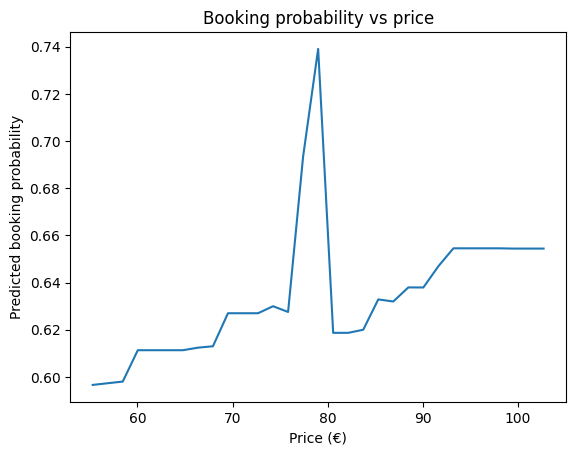

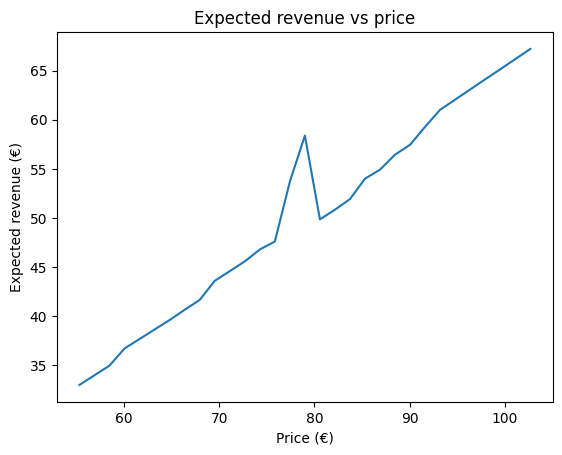

In [116]:
import matplotlib.pyplot as plt

# Plot booking probability vs price
plt.figure()
plt.plot(curve["price"], curve["booking_prob"])
plt.xlabel("Price (€)")
plt.ylabel("Predicted booking probability")
plt.title("Booking probability vs price")
plt.show()

# Plot expected revenue vs price
plt.figure()
plt.plot(curve["price"], curve["expected_revenue"])
plt.xlabel("Price (€)")
plt.ylabel("Expected revenue (€)")
plt.title("Expected revenue vs price")
plt.show()


## Case Studies: Exemples on how to use this pricing tool

### High demand airbnb

The first airbnb we select has a highly attractive listing: strong historical demand, low remaining availability, and good host reputation. For such features, the key question is whether the current price is too conservative and leaves revenue on the table.


In [ ]:
#Select the airbnb within the test set that has the "highest demand"
high_demand_idx = (
    X_test.sort_values(
        by=["availability_30", "estimated_revenue_l365d"],
        ascending=[True, False]
    )
    .index[0]
)

row_hd = X_test.loc[high_demand_idx]


# apply the pricing tool
base_price = float(row_hd["price_clean"])
price_grid_hd = np.linspace(0.7 * base_price, 1.4 * base_price, 40)

curve_hd = simulate_pricing_curve(row=row_hd, model=cal_sigmoid, price_grid=price_grid_hd)
best_hd = curve_hd.loc[curve_hd["expected_revenue"].idxmax()]

# Baseline expected revenue at current price
base_prob = cal_sigmoid.predict_proba(pd.DataFrame([row_hd]))[:, 1][0]
base_er = base_price * base_prob

print("\n--- Recommendation (High demand) ---")
print("Original price:", round(base_price, 2), "Prob:", round(base_prob, 3), "ER:", round(base_er, 2))
print("Best price:", round(best_hd['price'], 2), "Prob:", round(best_hd['booking_prob'], 3), "ER:", round(best_hd['expected_revenue'], 2))
print("Uplift %:", round((best_hd['expected_revenue'] - base_er) / (base_er + 1e-9) * 100, 1))

print("Case 1: High demand")
print("Index:", high_demand_idx)



--- Recommendation (High demand) ---
Baseline price: 570.0 Prob: 0.58 ER: 330.37
Best price: 798.0 Prob: 0.582 ER: 464.7
Uplift %: 40.7


### Low demand airbnb

Our second study case represents a listing with weak demand signals: many remaining available days and limited historical activity. Here, the pricing challenge is to stimulate demand rather than extract surplus.

In [123]:
#Select the airbnb within the test set that has the "lowest demand"
low_demand_idx = (
    X_test.sort_values(
        by=["availability_30", "estimated_revenue_l365d"],
        ascending=[False, True]
    )
    .index[0]
)

row_ld = X_test.loc[low_demand_idx]

print("Case 2: Low demand")
print("Index:", low_demand_idx)

#Apply pricing tool

base_price = float(row_ld["price_clean"])
price_grid_ld = np.linspace(0.6 * base_price, 1.2 * base_price, 40)

curve_ld = simulate_pricing_curve(row=row_ld, model=cal_sigmoid, price_grid=price_grid_ld)
best_ld = curve_ld.loc[curve_ld["expected_revenue"].idxmax()]

base_prob = cal_sigmoid.predict_proba(pd.DataFrame([row_ld]))[:, 1][0]
base_er = base_price * base_prob

print("\n--- Recommendation (Low demand) ---")
print("Original price:", round(base_price, 2), "Prob:", round(base_prob, 3), "ER:", round(base_er, 2))
print("Best price:", round(best_ld['price'], 2), "Prob:", round(best_ld['booking_prob'], 3), "ER:", round(best_ld['expected_revenue'], 2))
print("Uplift %:", round((best_ld['expected_revenue'] - base_er) / (base_er + 1e-9) * 100, 1))


Case 2: Low demand
Index: 5299

--- Recommendation (Low demand) ---
Original price: 29.0 Prob: 0.348 ER: 10.09
Best price: 34.8 Prob: 0.326 ER: 11.35
Uplift %: 12.5


### Seasonality adaptation

Our last case study will recommend a price-change depending on seasonality, for any airbnb randomely selected.
To do so, we isolate the effect of timing by comparing the same listing across two different dates, to see how we should adjust the prices depending on this timing change. 

Baseline row snapshot:
price_clean: 79.0
month/day: 5 3
availability_30: 0.0
estimated_revenue_l365d: 2538.0


In [132]:
# We create two versions of this randomely selected airbnb with the same features, but at two different dates

# we select a representative baseline row from X_test
row_base = X_test.sample(1, random_state=42).iloc[0].copy()

print("Baseline row snapshot:")
print("Original price", float(row_base["price_clean"]))

row_winter = row_base.copy()
row_summer = row_base.copy()

#Choose new dates
row_winter["month"] = 1
row_winter["day"] = 15

row_summer["month"] = 7
row_summer["day"] = 15

print("Winter month/day:", int(row_winter["month"]), int(row_winter["day"]))
print("Summer month/day:", int(row_summer["month"]), int(row_summer["day"]))


Baseline row snapshot:
Original price 79.0
Winter month/day: 1 15
Summer month/day: 7 15


In [134]:
def run_pricing(row, model, low=0.7, high=1.3, n=35):
    base_price = float(row["price_clean"])
    grid = np.linspace(low * base_price, high * base_price, n)
    curve = simulate_pricing_curve(row=row, model=model, price_grid=grid, price_col="price_clean")
    best = curve.loc[curve["expected_revenue"].idxmax()]
    return curve, best

curve_winter, best_winter = run_pricing(row_winter, cal_sigmoid)
curve_summer, best_summer = run_pricing(row_summer, cal_sigmoid)

print("Winter best price:", round(best_winter["price"], 2),
      "| prob:", round(best_winter["booking_prob"], 3),
      "| ER:", round(best_winter["expected_revenue"], 2))

print("Summer best price:", round(best_summer["price"], 2),
      "| prob:", round(best_summer["booking_prob"], 3),
      "| ER:", round(best_summer["expected_revenue"], 2))


Winter best price: 102.7 | prob: 0.654 | ER: 67.17
Summer best price: 102.7 | prob: 0.654 | ER: 67.17
